In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [43]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [68]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=10, random_state=0)
cluster = model.fit_predict(digits.data)
model.cluster_centers_.shape

(10, 64)

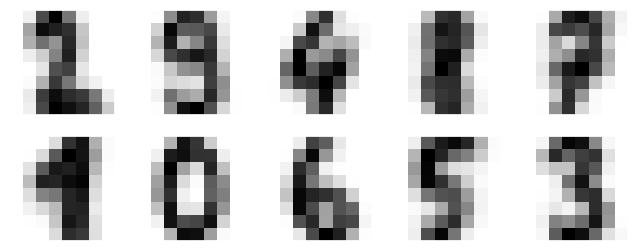

In [67]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = model.cluster_centers_.reshape(10, 8, 8)
for axi, i in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(i, interpolation='nearest', cmap=plt.cm.binary)

In [69]:
from scipy.stats import mode
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

/var/folders/df/_1rvc2nn35j2006ypzgcn9j80000gn/T/ipykernel_1266/3609502519.py:5: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(digits.target[mask])[0]


In [70]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7907623817473567

Text(110.44999999999997, 0.5, 'predicted label')

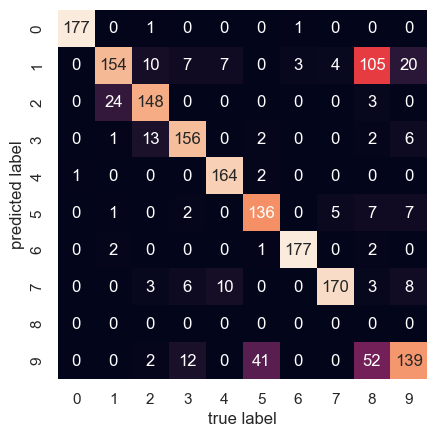

In [71]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
    xticklabels=digits.target_names,
    yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [72]:
from sklearn.manifold import TSNE
# Проекция данных: выполнение этого шага займет несколько секунд
tsne = TSNE(n_components=2, init='pca', random_state=0)
digits_proj = tsne.fit_transform(digits.data)
# Расчет кластеров
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)
# Перестановка меток местами
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]
# Оценка точности
accuracy_score(digits.target, labels)

/Users/nikitos/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/nikitos/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
/var/folders/df/_1rvc2nn35j2006ypzgcn9j80000gn/T/ipykernel_1266/3908026202.py:12: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(digits.target[mask])[0]


0.9432387312186978